<a href="https://colab.research.google.com/github/SharvinKumarArumugam/Githubproject/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy torch matplotlib


In [ ]:
from google.colab import files

# This will prompt you to select a file
uploaded = files.upload()


Saving population_state.csv to population_state.csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('population_state.csv')

# Display the first few rows of the DataFrame
print(df.head())
df

         date  state          sex          ethnicity          age  population
0  2020-01-01  Johor  overall_sex  overall_ethnicity  overall_age      4009.7
1  2020-01-01  Johor  overall_sex  overall_ethnicity          0-4       306.3
2  2020-01-01  Johor  overall_sex  overall_ethnicity          5-9       322.3
3  2020-01-01  Johor  overall_sex  overall_ethnicity        10-14       330.7
4  2020-01-01  Johor  overall_sex  overall_ethnicity        15-19       345.2


,date,state,sex,ethnicity,age,population
0,2020-01-01,Johor,overall_sex,overall_ethnicity,overall_age,4009.7
1,2020-01-01,Johor,overall_sex,overall_ethnicity,0-4,306.3
2,2020-01-01,Johor,overall_sex,overall_ethnicity,5-9,322.3
3,2020-01-01,Johor,overall_sex,overall_ethnicity,10-14,330.7
4,2020-01-01,Johor,overall_sex,overall_ethnicity,15-19,345.2
...,...,...,...,...,...,...
25531,2023-01-01,W.P. Putrajaya,female,other_noncitizen,65-69,0.0
25532,2023-01-01,W.P. Putrajaya,female,other_noncitizen,70-74,0.0
25533,2023-01-01,W.P. Putrajaya,female,other_noncitizen,75-79,0.0
25534,2023-01-01,W.P. Putrajaya,female,other_noncitizen,80-84,0.0


In [ ]:
import pandas as pd

# Assuming 'date' is a column in your DataFrame
df['date'] = pd.to_datetime(df['date'])

# Extract the year as an integer and create a new column 'year'
df['year'] = df['date'].dt.year

df.year

# Now, 'year' column contains the year as integers

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
25531    2023
25532    2023
25533    2023
25534    2023
25535    2023
Name: year, Length: 25536, dtype: int64

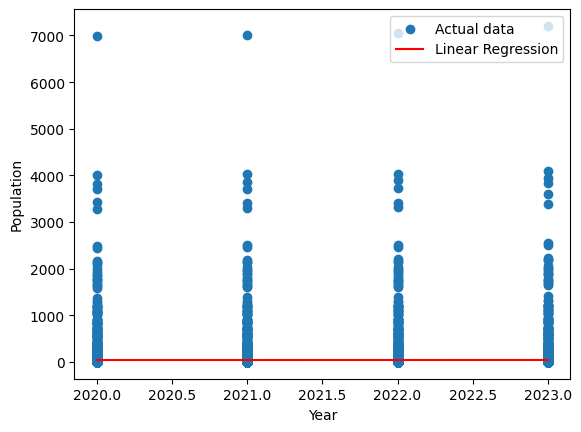

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'year' and 'births' columns in your DataFrame
year = df['year'].values.reshape(-1, 1)  # Reshape to a column vector
population = df['population'].values.reshape(-1, 1)

# Add a column of ones for the intercept term
X = np.hstack([np.ones_like(year), year])

# Calculate the coefficients using the normal equation
theta = np.linalg.inv(X.T @ X) @ X.T @ population

# Make predictions
predictions = X @ theta

# Plot the data and the regression line
plt.scatter(year, population, label='Actual data')
plt.plot(year, predictions, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Generate a simple dataset
np.random.seed(42)
years = np.arange(2020, 2024)
population = 1000 + 1000 * (years - 2020) + np.random.normal(0, 4, len(years))

# Create a DataFrame
df = pd.DataFrame({'year': years, 'population': population})

# Save the DataFrame to a CSV file
df.to_csv('population_state.csv', index=False)

# Calculate average population for each year
average_population = df.groupby('year')['population'].mean()

# Display the result
print("Average Population by Year:")
print(average_population)

Average Population by Year:
year
2020    1001.986857
2021    1999.446943
2022    3002.590754
2023    4006.092119
Name: population, dtype: float64


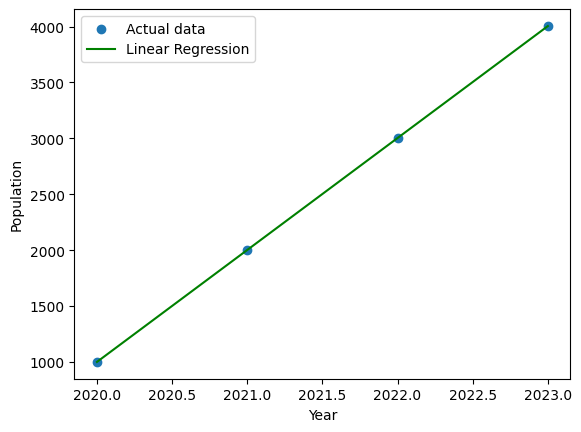

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('population_state.csv')

# Calculate average population for each year
average_population = df.groupby('year')['population'].mean().reset_index()
average_population.columns = ['year', 'average_population']

# Perform linear regression
year = average_population['year'].values.reshape(-1, 1)
population = average_population['average_population'].values.reshape(-1, 1)

X = np.hstack([np.ones_like(year), year])
theta = np.linalg.inv(X.T @ X) @ X.T @ population
predictions = X @ theta

# Plot the data and the regression line
plt.scatter(year, population, label='Actual data')
plt.plot(year, predictions, color='green', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

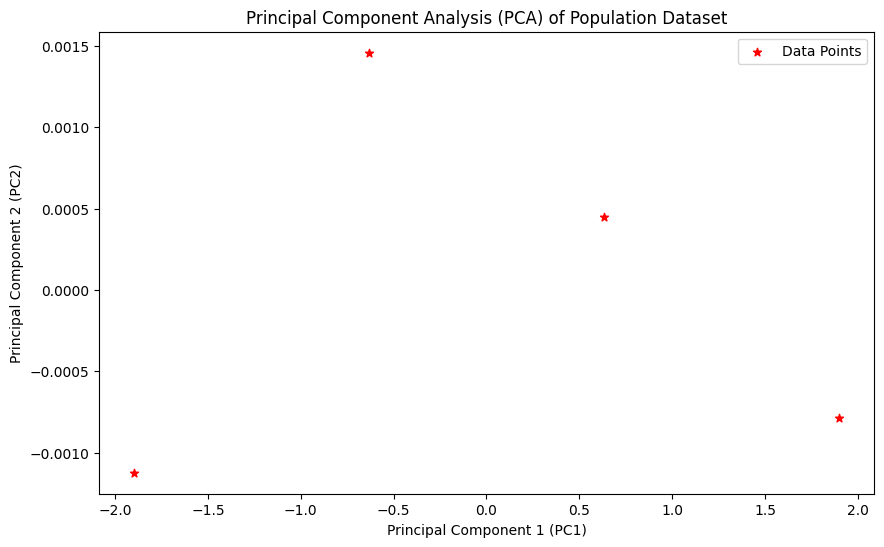

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset from the CSV file
df = pd.read_csv('population_state.csv')

# Pre-processing: Standardize the features
features = ['year', 'population']
x = df[features].values
x_standardized = StandardScaler().fit_transform(x)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_standardized)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate the principal components DataFrame with the original DataFrame
df_final = pd.concat([df, df_pca], axis=1)

# Visualize the data in the principal component space
plt.figure(figsize=(10, 6))
plt.scatter(df_final['PC1'], df_final['PC2'], color='r', marker='*', label='Data Points')
plt.title('Principal Component Analysis (PCA) of Population Dataset')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()


In [ ]:

def mean_square_error(y_true, y_pred):
    """
    Calculate the Mean Square Error (MSE).

    Parameters:
    - y_true: Actual values
    - y_pred: Predicted values

    Returns:
    - MSE
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return mse


In [ ]:
def compute_coefficients(X, y):
    """
    Compute coefficients (weights) using matrix operations.

    Parameters:
    - X: Design matrix
    - y: Target variable

    Returns:
    - Coefficients (weights)
    """
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
    return coefficients

In [ ]:
# Assuming 'year' and 'births' columns in your DataFrame
year = df['year'].values.reshape(-1, 1)  # Reshape to a column vector
population = df['population'].values.reshape(-1, 1)

# Add a column of ones for the intercept term
X = np.hstack([np.ones_like(year), year])

# Compute coefficients using the defined function
theta = compute_coefficients(X, population)

# Make predictions
predictions = X @ theta

# Calculate Mean Square Error
mse = mean_square_error(population, predictions)

print(f'Coefficents (Weights): {theta.flatten()}')
print(f'Mean Square Error: {mse}')

Coefficents (Weights): [-2.02212263e+06  1.00154596e+03]
Mean Square Error: 2.635667068499565


MSE for population_state.csv: 10.88288693797274


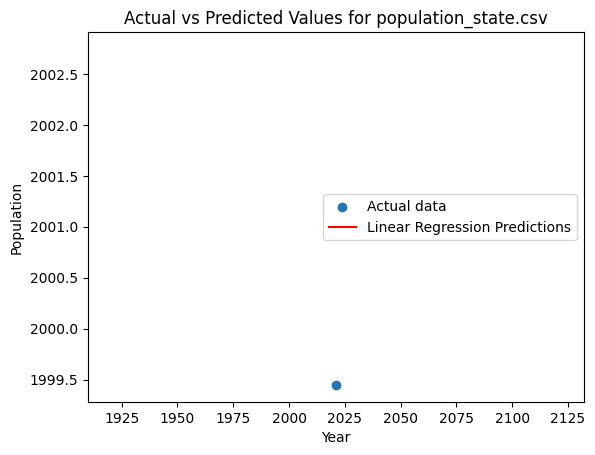

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df_population = pd.read_csv('population_state.csv')

# Extract features and target
X_population = df_population['year'].values.reshape(-1, 1)
y_population = df_population['population'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train_population, X_test_population, y_train_population, y_test_population = train_test_split(
    X_population, y_population, test_size=0.2, random_state=42
)

# Create a linear regression model
model_population = LinearRegression()

# Train the model using the training set
model_population.fit(X_train_population, y_train_population)

# Make predictions on the testing set
predictions_population = model_population.predict(X_test_population)

# Calculate Mean Squared Error on the testing set
mse_population = mean_squared_error(y_test_population, predictions_population)
print(f'MSE for population_state.csv: {mse_population}')

# Visualize the actual vs predicted values
plt.scatter(X_test_population, y_test_population, label='Actual data')
plt.plot(X_test_population, predictions_population, color='red', label='Linear Regression Predictions')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.title('Actual vs Predicted Values for population_state.csv')
plt.show()


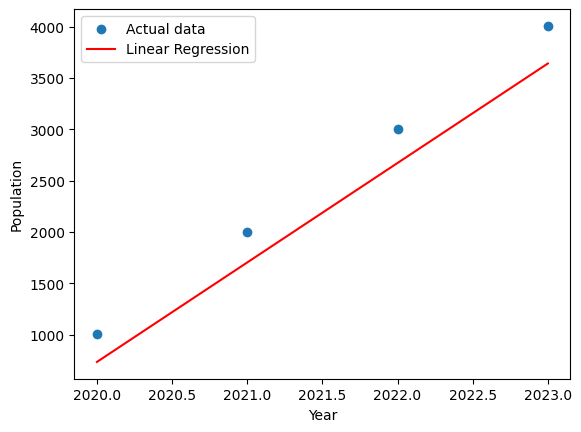

Intercept: -1955770.0
Slope (Coefficient for Year): 968.5665893554688


In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('population_state.csv')

# Extract features and target
X = df['year'].values.reshape(-1, 1)
y = df['population'].values.reshape(-1, 1)

# Convert NumPy arrays to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Add a column of ones for the intercept term
X_tensor = torch.cat([torch.ones_like(X_tensor), X_tensor], axis=1)

# Calculate coefficients using matrix operations
theta = torch.inverse(X_tensor.t() @ X_tensor) @ X_tensor.t() @ y_tensor

# Make predictions
predictions = X_tensor @ theta

# Convert predictions tensor to NumPy array for plotting
predictions_np = predictions.detach().numpy()

# Plot the data and the regression line
plt.scatter(X, y, label='Actual data')
plt.plot(X, predictions_np, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

# Display the coefficients
print(f'Intercept: {theta[0][0].item()}')
print(f'Slope (Coefficient for Year): {theta[1][0].item()}')
